In [14]:
# Load required libraries
library(dplyr)

# Set parameters
set.seed(123)

# Initial average number of customers per day
avg_customers = rpois(1, 100)

# Age group probabilities
age_probs = c(0.2, 0.35, 0.45)

# Average packets purchased for each age group (Poisson means)
packets_mean = c(10, 20, 5)

# Current Scenario: Expected total items sold in a day
expected_items = avg_customers * sum(age_probs * packets_mean)
print(expected_items)

# Option 1: Increase the number of customers by 10%
increased_customers = avg_customers * 1.1
expected_items_opt1 = increased_customers * sum(age_probs * packets_mean)
print(expected_items_opt1)

# Option 2: Increase packets purchased for 20-60 age group by 15%
new_packets_mean = packets_mean
new_packets_mean[1:2] = packets_mean[1:2] * 1.15  # Adjust 20-40 and 40-60 groups
expected_items_opt2 = avg_customers * sum(age_probs * new_packets_mean)
print(expected_items_opt2)
print("---------------")

# Standard deviations for risk comparison
# Variance of Poisson distribution equals its mean
current_variance = avg_customers * sum(age_probs * packets_mean)
current_sd = sqrt(current_variance)


variance_opt1 = increased_customers * sum(age_probs * packets_mean)
sd_opt1 = sqrt(variance_opt1)

variance_opt2 = avg_customers * sum(age_probs * new_packets_mean)
sd_opt2 = sqrt(variance_opt2)


print(current_sd)
print(sd_opt1)
print(sd_opt2)
print('---------------')

# Determine which option has the greatest increase and is least risky
increase_opt1 = expected_items_opt1 - expected_items
increase_opt2 = expected_items_opt2 - expected_items

print(paste("Increase in expected total items (Option 1):", increase_opt1))
print(paste("Increase in expected total items (Option 2):", increase_opt2))

print("Risk (Standard Deviation):")
print(paste("Current:", current_sd))
print(paste("Option 1:", sd_opt1))
print(paste("Option 2:", sd_opt2))

[1] 1125
[1] 1237.5
[1] 1260
[1] "---------------"
[1] 33.54102
[1] 35.17812
[1] 35.49648
[1] "---------------"
[1] "Increase in expected total items (Option 1): 112.5"
[1] "Increase in expected total items (Option 2): 135"
[1] "Risk (Standard Deviation):"
[1] "Current: 33.5410196624968"
[1] "Option 1: 35.1781181986757"
[1] "Option 2: 35.4964786985977"


In [66]:
# Step 1: Set the initial parameters
num_customers <- 100  # Average number of customers per day
age_groups <- c(0, 1, 2)  # Age group encoding

# Probability of customers in each age group
prob_20_40 <- 0.2
prob_40_60 <- 0.35
prob_60_above <- 0.45

# Average number of packets bought by each age group (Poisson lambda)
lambda_20_40 <- 10
lambda_40_60 <- 20
lambda_60_above <- 5

# Step 2: Simulate the current total number of packets sold
set.seed(123)  # For reproducibility

# Generate the age group for each customer
age_group <- sample(age_groups, num_customers, replace = TRUE, prob = c(prob_20_40, prob_40_60, prob_60_above))

# Generate the number of packets bought by each customer based on age group
packets <- sapply(age_group, function(x) {
  if (x == 0) {
    rpois(1, lambda_20_40)
  } else if (x == 1) {
    rpois(1, lambda_40_60)
  } else {
    rpois(1, lambda_60_above)
  }
})

# Calculate the total number of packets sold per day
current_total_packets <- sum(packets)
current_expected_total <- mean(current_total_packets)

In [71]:
age_group

[1] 2 1 2 0 0 2 1 0 1 1 0 1 1 1 2 0 2 2 2 0 0 1 1 0 1 1 1 1 2 2 0 0 1 1 2 1 1
 [38] 2 2 2 2 2 2 2 2 2 2 1 2 0 2 2 1 2 1 2 2 1 0 2 1 2 2 2 0 2 0 0 1 2 1 1 1 2
 [75] 1 2 2 1 2 2 2 1 2 1 2 2 0 0 0 2 2 1 2 1 2 2 1 2 1 1

In [67]:
# Step 3: Apply Option 1 - Increase the expected number of customers by 10%
new_num_customers_option1 <- num_customers * 1.1
age_group_option1 <- sample(age_groups, new_num_customers_option1, replace = TRUE, prob = c(prob_20_40, prob_40_60, prob_60_above))

packets_option1 <- sapply(age_group_option1, function(x) {
  if (x == 0) {
    rpois(1, lambda_20_40)
  } else if (x == 1) {
    rpois(1, lambda_40_60)
  } else {
    rpois(1, lambda_60_above)
  }
})

new_expected_total_option1 <- mean(sum(packets_option1))

In [68]:
# Step 4: Apply Option 2 - Increase the expected number of packets for age groups 20-60 by 15%
new_lambda_20_40 <- lambda_20_40 * 1.15
new_lambda_40_60 <- lambda_40_60 * 1.15

packets_option2 <- sapply(age_group, function(x) {
  if (x == 0) {
    rpois(1, new_lambda_20_40)
  } else if (x == 1) {
    rpois(1, new_lambda_40_60)
  } else {
    rpois(1, lambda_60_above)
  }
})

new_expected_total_option2 <- mean(sum(packets_option2))


In [69]:
# Step 5: Compare results and calculate the standard deviation (risk)
current_sd <- sd(packets)
option1_sd <- sd(packets_option1)
option2_sd <- sd(packets_option2)


In [70]:
# Print the results
cat("Current Expected Total Packets Sold per Day:", current_expected_total, "\n")
cat("Expected Total Packets Sold (Option 1):", new_expected_total_option1, "\n")
cat("Expected Total Packets Sold (Option 2):", new_expected_total_option2, "\n")

cat("\nStandard Deviation (Risk)\n")
cat("Current Standard Deviation:", current_sd, "\n")
cat("Option 1 Standard Deviation:", option1_sd, "\n")
cat("Option 2 Standard Deviation:", option2_sd, "\n")

Current Expected Total Packets Sold per Day: 1115 
Expected Total Packets Sold (Option 1): 1135 
Expected Total Packets Sold (Option 2): 1242 

Standard Deviation (Risk)
Current Standard Deviation: 7.007031 
Option 1 Standard Deviation: 6.852217 
Option 2 Standard Deviation: 8.83654 


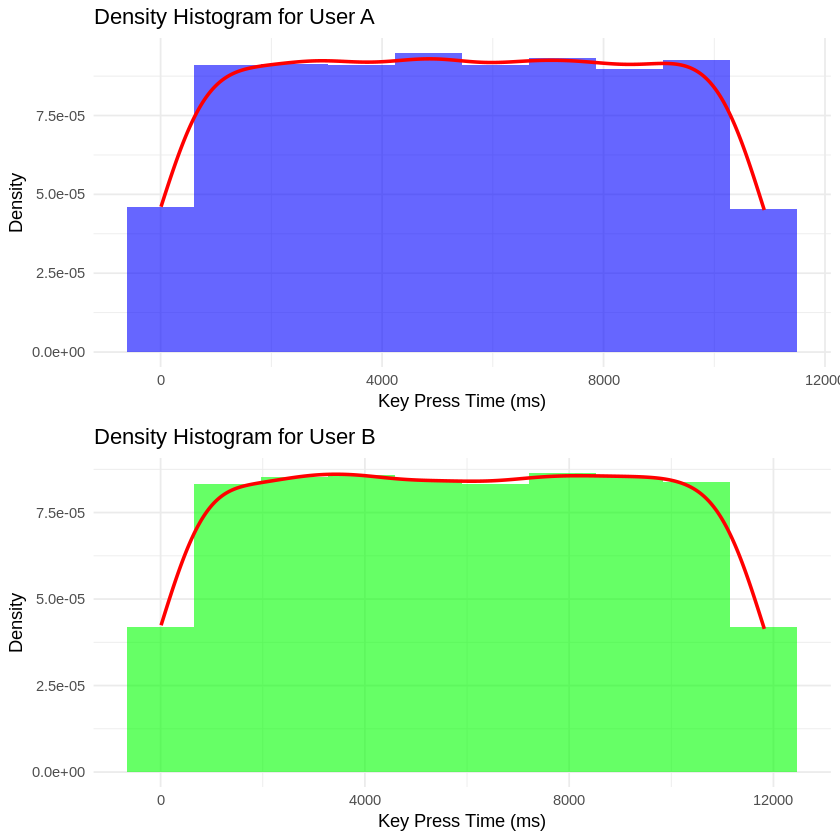

In [57]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("gridExtra")) install.packages("gridExtra")

# Load libraries
library(dplyr)
library(ggplot2)
library(gridExtra)

# Load the data
biometrics_data = read.csv("Biometrics.csv")

# Transform the data to long format for easier plotting
biometrics_long = biometrics_data %>%
  pivot_longer(cols = c(A, B), names_to = "User", values_to = "KeyPressTime")

# Plot density histogram for User A
plot_a = ggplot(filter(biometrics_long, User == "A"), aes(x = KeyPressTime)) +
  geom_histogram(aes(y = after_stat(density)), bins = 10, fill = "blue", alpha = 0.6) +
  geom_density(color = "red", size = 1) +
  labs(title = "Density Histogram for User A", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Plot density histogram for User B
plot_b = ggplot(filter(biometrics_long, User == "B"), aes(x = KeyPressTime)) +
  geom_histogram(aes(y = after_stat(density)), bins = 10, fill = "green", alpha = 0.6) +
  geom_density(color = "red", size = 1) +
  labs(title = "Density Histogram for User B", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Arrange the plots vertically
grid.arrange(plot_a, plot_b, ncol = 1)


In [80]:
prod(dnorm(diff(email_data$Time), 8.03, 1.919))/ prod(dnorm(diff(email_data$Time), 7.4, 1.995))

[1] 131.3721

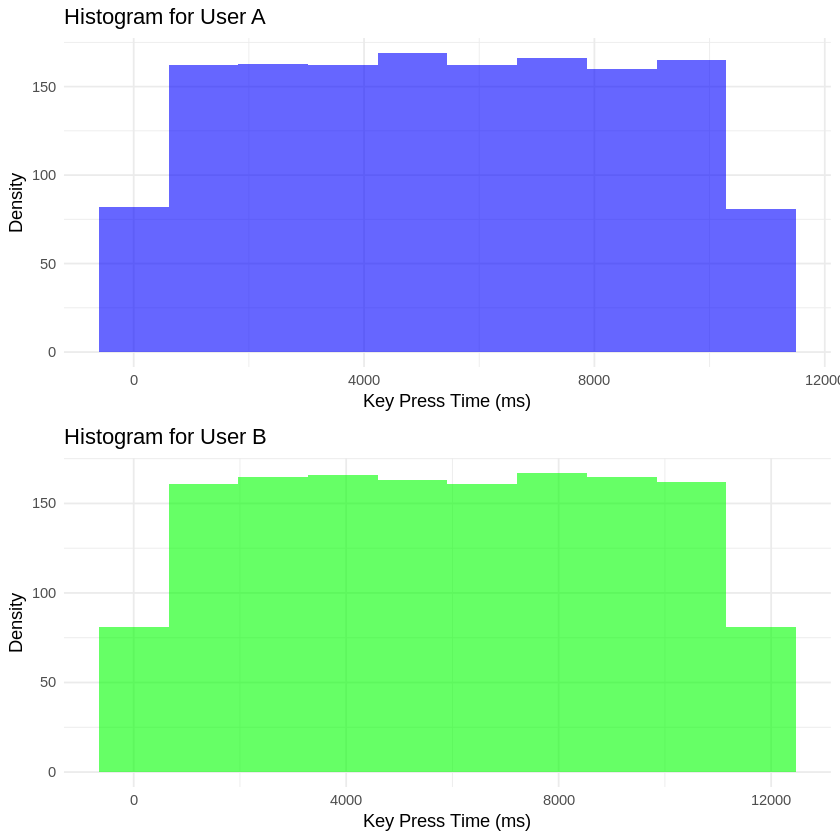

In [58]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("gridExtra")) install.packages("gridExtra")

# Load libraries
library(dplyr)
library(ggplot2)
library(gridExtra)

# Load the data
biometrics_data = read.csv("Biometrics.csv")

# Transform the data to long format for easier plotting
biometrics_long = biometrics_data %>%
  pivot_longer(cols = c(A, B), names_to = "User", values_to = "KeyPressTime")

# Plot histogram for User A
plot_a = ggplot(filter(biometrics_long, User == "A"), aes(x = KeyPressTime)) +
  geom_histogram(bins = 10, fill = "blue", alpha = 0.6) +
  labs(title = "Histogram for User A", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Plot histogram for User B
plot_b = ggplot(filter(biometrics_long, User == "B"), aes(x = KeyPressTime)) +
  geom_histogram(bins = 10, fill = "green", alpha = 0.6) +
  labs(title = "Histogram for User B", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Arrange the plots vertically
grid.arrange(plot_a, plot_b, ncol = 1)


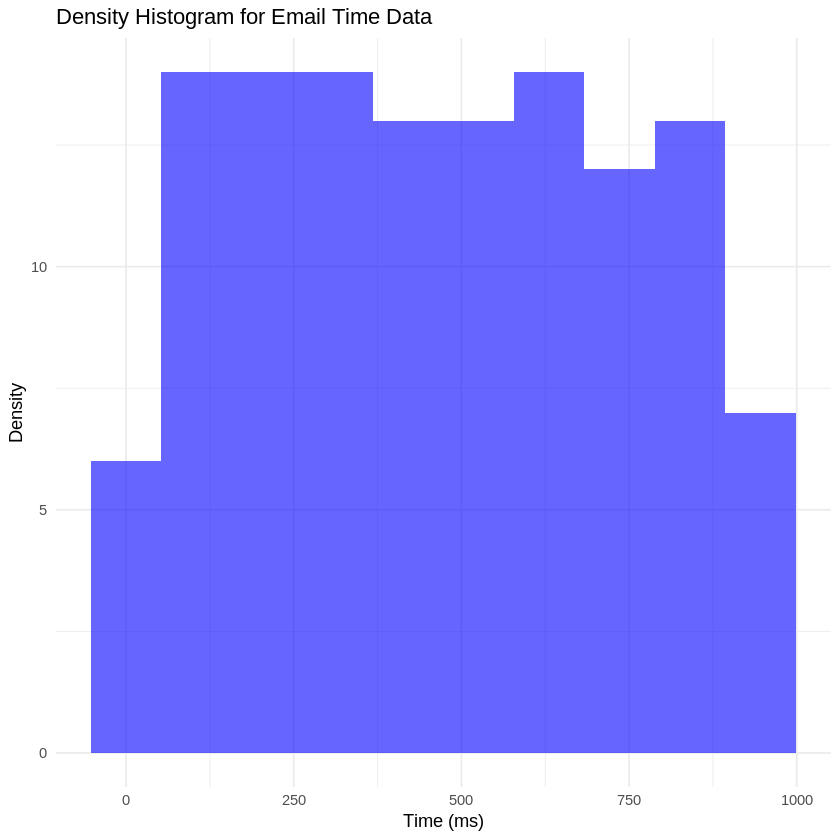

In [61]:
email_data = read.csv("email.csv")


# Assuming there is a column named 'Time' you want to plot; adapt if needed
# Plot density histogram for 'Time' in email.csv
plot_email = ggplot(email_data, aes(x = Time)) +
  geom_histogram(bins = 10,fill = "blue", alpha = 0.6) +
  labs(title = "Density Histogram for Email Time Data", x = "Time (ms)", y = "Density") +
  theme_minimal()


# Display the plot
print(plot_email)

In [59]:
# Load the email data
email_data = read.csv("email.csv")


# Calculate Euclidean distances between the email data and biometric data for both users
distance_A = sqrt(sum((email_data$Time - biometrics_data$A)^2))
distance_B = sqrt(sum((email_data$Time - biometrics_data$B)^2))

# Print the distances for verification
print(paste("Distance to User A:", distance_A))
print(paste("Distance to User B:", distance_B))

# Determine the author based on the minimum distance
if (distance_A < distance_B) {
  print("The author of the email is most likely User A.")
} else {
  print("The author of the email is most likely User B.")
}

Warning message in email_data$Time - biometrics_data$A:
“longer object length is not a multiple of shorter object length”
Warning message in email_data$Time - biometrics_data$B:
“longer object length is not a multiple of shorter object length”


[1] "Distance to User A: 226218.30620467"
[1] "Distance to User B: 246409.59451314"
[1] "The author of the email is most likely User A."


In [41]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")

# Load libraries
library(dplyr)

# Load the known data
biometrics_data = read.csv("Biometrics.csv")

# Load the unknown user data
email_data = read.csv("email.csv")

# Match only the keys present in the email data
common_keys = intersect(email_data$Key, biometrics_data$Key)

# Filter the known data and email data to only include common keys
filtered_biometrics = biometrics_data %>% filter(Key %in% common_keys)
filtered_email = email_data %>% filter(Key %in% common_keys)

# Ensure the rows are matched by Key
filtered_biometrics = filtered_biometrics[match(filtered_email$Key, filtered_biometrics$Key), ]

# Calculate MAE for User A
mae_a = mean(abs(filtered_email$Time - filtered_biometrics$A))

# Calculate MAE for User B
mae_b = mean(abs(filtered_email$Time - filtered_biometrics$B))

# Determine the closest match
if (mae_a < mae_b) {
  result = "The unknown user is more likely User A"
} else {
  result = "The unknown user is more likely User B"
}

# Print results
cat("MAE for User A:", mae_a, "\n")
cat("MAE for User B:", mae_b, "\n")
cat(result, "\n")


MAE for User A: 481.5775 
MAE for User B: 478.6 
The unknown user is more likely User B 


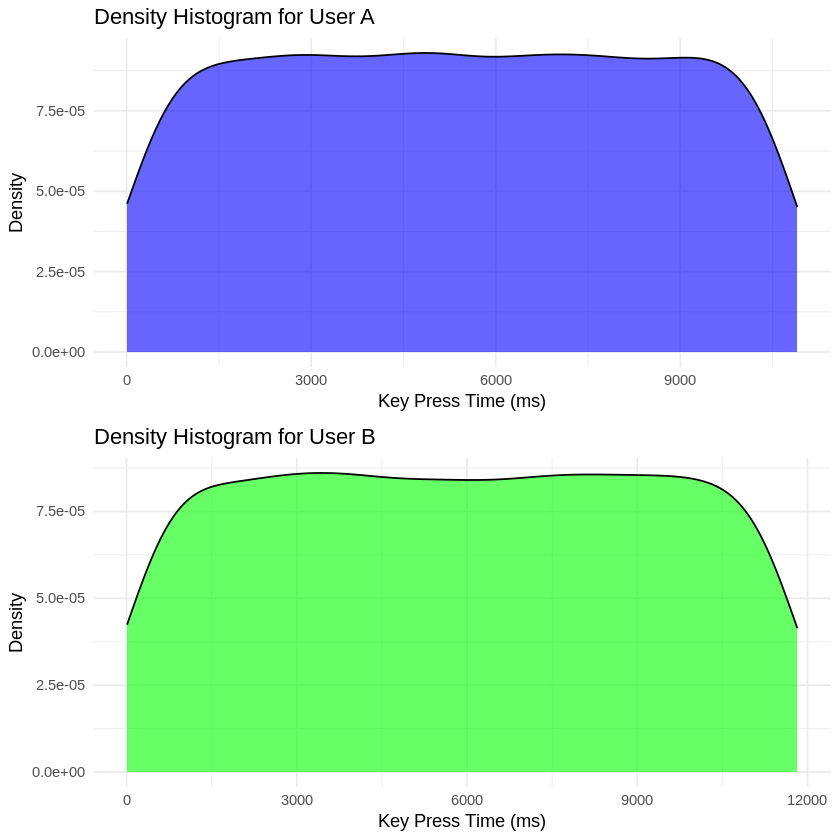

In [52]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("gridExtra")) install.packages("gridExtra")

# Load libraries
library(dplyr)
library(ggplot2)
library(gridExtra)

# Load the data
biometrics_data = read.csv("Biometrics.csv")


# Transform the data to long format if there are multiple columns to compare
biometrics_long = biometrics_data %>%
  pivot_longer(cols = c(A, B), names_to = "User", values_to = "KeyPressTime")

# Plot density histogram for User A
plot_a = ggplot(filter(biometrics_long, User == "A"), aes(x = KeyPressTime)) +
  geom_density(fill = "blue", alpha = 0.6) +
  labs(title = "Density Histogram for User A", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Plot density histogram for User B
plot_b = ggplot(filter(biometrics_long, User == "B"), aes(x = KeyPressTime)) +
  geom_density(fill = "green", alpha = 0.6) +
  labs(title = "Density Histogram for User B", x = "Key Press Time (ms)", y = "Density") +
  theme_minimal()

# Arrange the plots vertically
grid.arrange(plot_a, plot_b, ncol = 1)


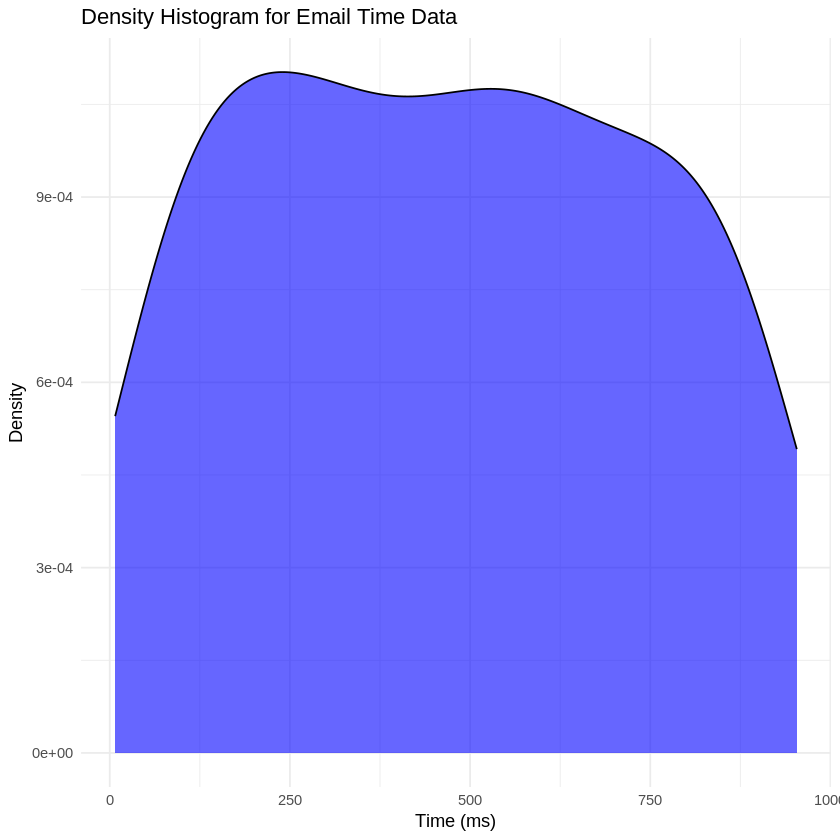

In [47]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("gridExtra")) install.packages("gridExtra")

# Load libraries
library(dplyr)
library(ggplot2)
library(gridExtra)

# Load the data
email_data = read.csv("email.csv")


# Assuming there is a column named 'Time' you want to plot; adapt if needed
# Plot density histogram for 'Time' in email.csv
plot_email = ggplot(email_data, aes(x = Time)) +
  geom_density(fill = "blue", alpha = 0.6) +
  labs(title = "Density Histogram for Email Time Data", x = "Time (ms)", y = "Density") +
  theme_minimal()

# Display the plot
print(plot_email)


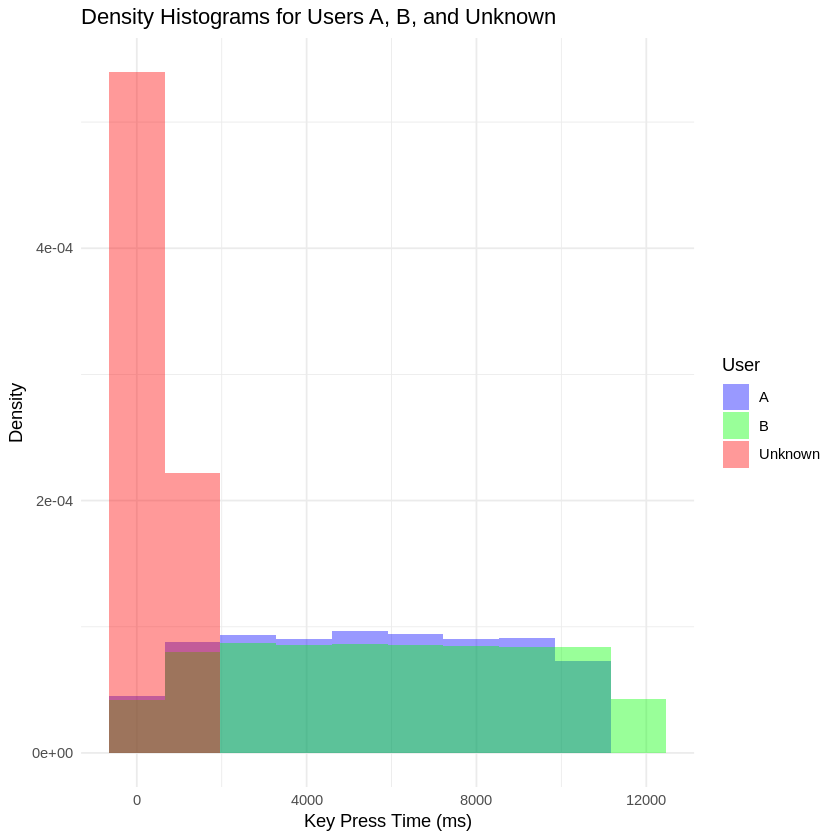

In [27]:
# Install required packages if not already installed
if (!require("dplyr")) install.packages("dplyr")
if (!require("ggplot2")) install.packages("ggplot2")
if (!require("tidyverse")) install.packages("tidyverse")
if (!require("gridExtra")) install.packages("gridExtra")

# Load libraries
library(dplyr)
library(ggplot2)
library(tidyverse)
library(gridExtra)

# Load known data
biometrics_data = read.csv("Biometrics.csv")

# Load unknown user data
email_data = read.csv("email.csv")

# Match only the keys present in the email data
common_keys = intersect(email_data$Key, biometrics_data$Key)
filtered_biometrics = biometrics_data %>% filter(Key %in% common_keys)
filtered_email = email_data %>% filter(Key %in% common_keys)

# Transform known data to long format for plotting
biometrics_long = filtered_biometrics %>%
  pivot_longer(cols = c(A, B), names_to = "User", values_to = "KeyPressTime") %>%
  mutate(User = as.factor(User))

# Add the unknown user data to the dataset
email_long = filtered_email %>%
  mutate(User = "Unknown") %>%
  rename(KeyPressTime = Time)

combined_data = bind_rows(biometrics_long, email_long)

# Plot density histograms for A, B, and the unknown user
plot = ggplot(combined_data, aes(x = KeyPressTime, fill = User)) +
  geom_histogram(aes(y = ..density..), position = "identity", alpha = 0.4, bins = 10) +
  labs(title = "Density Histograms for Users A, B, and Unknown", x = "Key Press Time (ms)", y = "Density") +
  scale_fill_manual(values = c("blue", "green", "red")) +
  theme_minimal()

# Display the plot
print(plot)
